<a href="https://colab.research.google.com/github/genadidharma/pengolahan-citra-dan-visi-komputer/blob/main/Week%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Praktikum

Mengubah tingkat kecerahan citra
--------------------------------
Masukan nilai kecerahan: 60


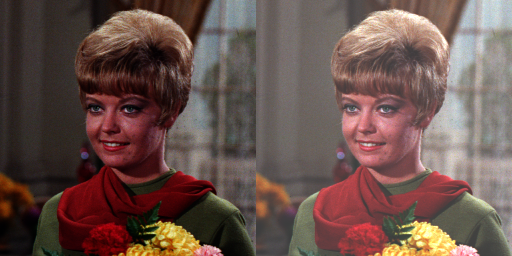

In [48]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukan nilai kecerahan: '))
except:
  print('Error, nilai bungkan angka')

original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 3/Source/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#Accessing pixels
# for y in range(original.shape[0]):
#   for x in range(original.shape[1]):
#     for c in range(original.shape[2]):
#       brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#simpler function to accesing pixels
brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Tugas

1. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori,

Mengubah tingkat kecerahan citra
--------------------------------
Masukan nilai kecerahan(-255 - 255): 60
Masukan nilai kontras(1.0 - 3.0): 1.5


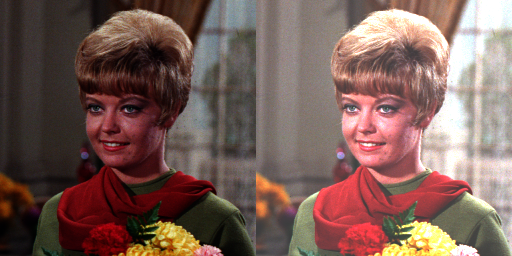

In [49]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukan nilai kecerahan(-255 - 255): '))
  contrast = float(input('Masukan nilai kontras(1.0 - 3.0): '))
except:
  print('Error, nilai bungkan angka')

original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 3/Source/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#Accessing pixels
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

#simpler function to accesing pixels  
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi logarithmic brightness

Mengubah tingkat kecerahan citra
--------------------------------
Masukan nilai kecerahan: 40


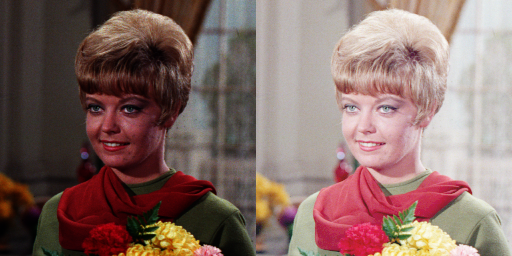

In [50]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukan nilai kecerahan: '))
except:
  print('Error, nilai bungkan angka')

original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 3/Source/female.tiff')

#Apply log transformation method
c = 255/np.log(1 + np.max(original))
log_image = c * (np.log(original+1))

#Specify data type so the int value converted to float
log_image = np.array(log_image, dtype=np.uint8)

final_frame = cv.hconcat((original, log_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance

a. Grayscale Averaging

Grayscale Averaging
--------------------------------


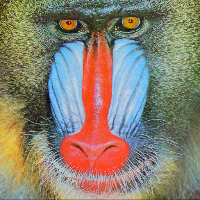

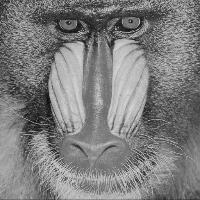

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

print('Grayscale Averaging')
print('--------------------------------')

original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 3/Source/mandrill.tiff')
original = cv.resize(original, (200,200))

#Apply averaging grayscale method
grayscale_image = np.mean(original, axis=2)

cv2_imshow(original)
cv2_imshow(grayscale_image)

b. Lightness Averaging

Lightness Averaging
--------------------------------


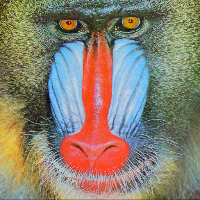

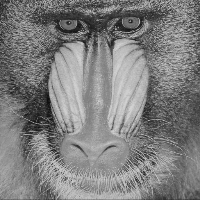

In [52]:
print('Lightness Averaging')
print('--------------------------------')

original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 3/Source/mandrill.tiff')
original = cv.resize(original, (200,200))

#Apply averaging grayscale method
grayscale_lightness_image = np.max(original, axis=2) / 2 + np.min(original, axis=2) / 2

cv2_imshow(original)
cv2_imshow(grayscale_lightness_image)

b. Luminance Averaging

Luminance Averaging
--------------------------------


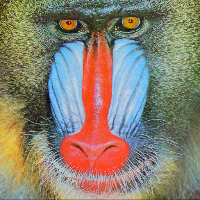

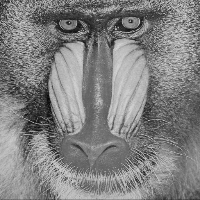

In [53]:
print('Luminance Averaging')
print('--------------------------------')

original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 3/Source/mandrill.tiff')
original = cv.resize(original, (200,200))

#Split the color
(b, g, r) = cv.split(original)

#Apply luminance grayscale method
grayscale_luminance_image = 0.07*b + 0.72*g + 0.21*r

cv2_imshow(original)
cv2_imshow(grayscale_luminance_image)

4. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna merah pada citra masukan dan ubah bagian lain yang tidak berwarna merah menjadi grayscale

Luminance Averaging
--------------------------------


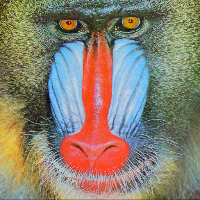

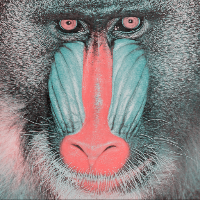

In [54]:
print('Luminance Averaging')
print('--------------------------------')

original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 3/Source/mandrill.tiff')
original = cv.resize(original, (200,200))

# Convert the image to grayscale
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

# Split the color
(b, g, r) = cv.split(original)

# show Gray + Gray + Red image channel only
rg_grayscale = cv.merge([gray, gray, r])

cv2_imshow(original)
cv2_imshow(rg_grayscale)